In [1]:
import platform
import os
if platform.system() == 'Darwin':
    DATA_PATH = "/Users/maltegenschow/Documents/Uni/Thesis/Data.nosync"
    ROOT_PATH = "/Users/maltegenschow/Documents/Uni/Thesis/Thesis"
elif platform.system() == 'Linux':
    DATA_PATH = "/pfs/work7/workspace/scratch/tu_zxmav84-thesis/Data.nosync"
    ROOT_PATH = "/pfs/work7/workspace/scratch/tu_zxmav84-thesis/Thesis"

current_wd = os.getcwd()

In [14]:
from glob import glob
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

### Single Attribute Training: Category

In [3]:
with open('slurm-23791837.out') as f:
    s = f.read()

In [4]:
# Initialize lists to hold the parsed data
epochs = []
steps = []
logPs = []

# Regular expressions to match the epoch and logP lines
epoch_regex = re.compile(r'----- Epoch: (\d+)')
logP_regex = re.compile(r'Step: (\d+) - logP: ([\d\.]+)')

# Variables to keep track of the current epoch
current_epoch = None

# Split the string into lines and parse
for line in s.split('\n'):
    epoch_match = epoch_regex.match(line)
    if epoch_match:
        current_epoch = int(epoch_match.group(1))
        continue

    logP_match = logP_regex.match(line)
    if logP_match:
        step = int(logP_match.group(1))
        logP = float(logP_match.group(2))
        epochs.append(current_epoch)
        steps.append(step)
        logPs.append(logP)

# Create the DataFrame
df = pd.DataFrame({
    'Epoch': epochs,
    'Step': steps,
    'LogP': logPs
})

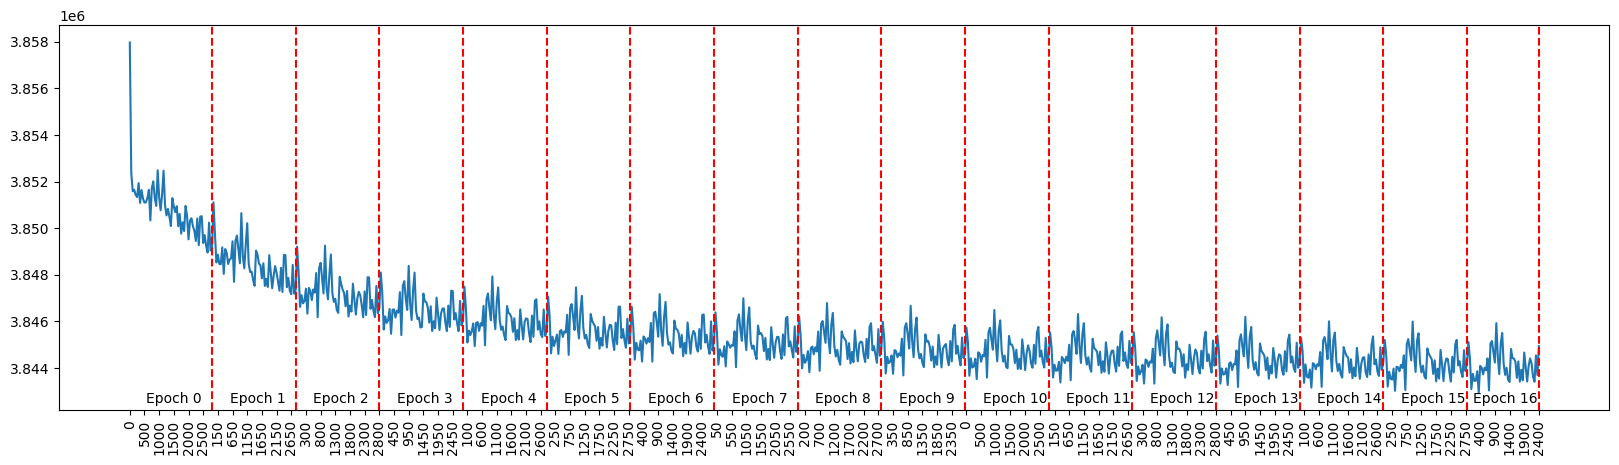

In [51]:
df['epoch_end'] = np.where(df.Epoch != df.Epoch.shift(-1),1,0)

fig, ax = plt.subplots(figsize = (20,5))
plt.plot(df.LogP)

for i, idx in enumerate(df[df.epoch_end ==1].index):
    plt.axvline(idx, linestyle = '--', color='red')
    plt.text(idx-45, 3842500, f'Epoch {i}')

xticks = [i for i in range(len(df)) if i % 10 == 0]
xlabels = [df['Step'].iloc[i] for i in xticks]

plt.xticks(ticks=xticks, labels=xlabels, rotation=90)

plt.show()